In [42]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [29]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print('Training data first row & shape')
print(train_data[0])
print(train_data.shape)
print('\nTraining targets first row & shape')
print(train_targets[0])
print(train_targets.shape)

print('\nTesting data first row & shape')
print(test_data[0])
print(test_data.shape)
print('\nTesting targets first row & shape')
print(test_targets[0])
print(test_targets.shape)

Training data first row & shape
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
(404, 13)

Training targets first row & shape
15.2
(404,)

Testing data first row & shape
[ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
(102, 13)

Testing targets first row & shape
7.2
(102,)


In [30]:
# Standardizing without data leakage
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# replicate on test data without refitting
test_data -= mean
test_data /= std

print('Standardized training data first row')
print(train_data[0])

print('Standardized testing data first row')
print(test_data[0])

Standardized training data first row
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
Standardized testing data first row
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


In [31]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)])

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [32]:
k = 4
num_epochs      = 500
num_values      = len(train_data) // k
all_mae_history = []

for i in range(k):
  print(f'Training on fold {i}')
  val_data    = train_data[i * num_values : (1 + i) * num_values]
  val_targets = train_targets[i * num_values : (1 + i) * num_values]
  partial_train_data = np.concatenate([
      train_data[: i * num_values],
      train_data[(i+1) * num_values :]
  ], axis=0)
  partial_train_targets = np.concatenate([
      train_targets[: i * num_values],
      train_targets[(i+1) * num_values :]
  ], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs
            , validation_data = (val_data, val_targets)
            , batch_size=16, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

Training on fold 0
Training on fold 1
Training on fold 2
Training on fold 3


In [41]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

print(average_mae_history)

[np.float64(19.073474407196045), np.float64(15.375788927078247), np.float64(11.003950834274292), np.float64(7.442102909088135), np.float64(5.747506141662598), np.float64(4.7903138399124146), np.float64(4.073367774486542), np.float64(3.666469395160675), np.float64(3.4590577483177185), np.float64(3.2924546003341675), np.float64(3.1669090390205383), np.float64(3.1237952709198), np.float64(2.948979377746582), np.float64(2.878409266471863), np.float64(2.861121714115143), np.float64(2.7972079515457153), np.float64(2.7811627984046936), np.float64(2.7203198075294495), np.float64(2.6875173449516296), np.float64(2.6647021174430847), np.float64(2.5731242299079895), np.float64(2.571109652519226), np.float64(2.550951659679413), np.float64(2.6573914289474487), np.float64(2.5755834579467773), np.float64(2.541658401489258), np.float64(2.5241678953170776), np.float64(2.514106571674347), np.float64(2.5023005604743958), np.float64(2.4929487705230713), np.float64(2.4843289852142334), np.float64(2.48116052

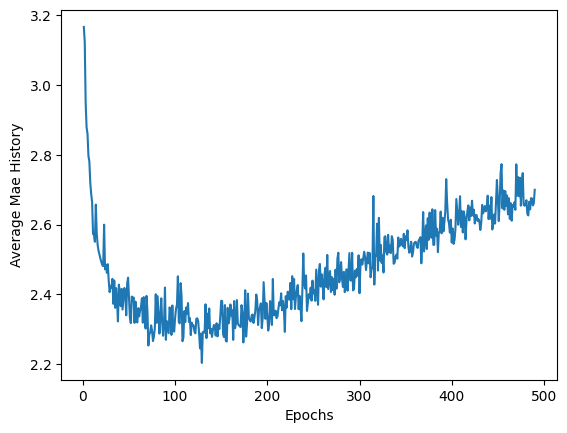

In [45]:
truncated_average_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_average_mae_history) + 1), truncated_average_mae_history)
plt.ylabel('Average Mae History')
plt.xlabel('Epochs')
plt.show()

In [46]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.2146 - mae: 2.4666
2.7260987758636475


In [47]:
predictions = model.predict(test_data)

print(predictions[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[8.078001]
